# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [54]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [23]:
print "Raw Count"
print df_raw.count()
df_clean = df_raw[pd.notnull(df_raw.admit) & pd.notnull(df_raw.gre) & pd.notnull(df_raw.gpa) & pd.notnull(df_raw.prestige)]
print "\nClean Count"
print df_clean.count()

Raw Count
admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Clean Count
admit       397
gre         397
gpa         397
prestige    397
dtype: int64


Answer: There's a total of 400 rows, but only 397 rows have complete data.

#### Question 2. Create a summary table

In [32]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because the GPA only has a range from 0-4.0, whereas GRE goes all the way from 220 to 800. In other words, the bigger the range, the more of a chance of a higher standard deviation. In this case, there are simply more widely dispersed values for GRE than GPA.

#### Question 4. Drop data points with missing data


In [38]:
#see question 1
print df_clean.count()
df_clean.describe()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64


,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: As seen in question 1, the counts only include cells where the value is not null. Looking at the sanitized data count of each column we can see that the counts are now the same for each variable. In addition, we can see that the percentile calculations are now no longer NaN, since they no longer encounter null values.

#### Question 6. Create box plots for GRE and GPA

GRE


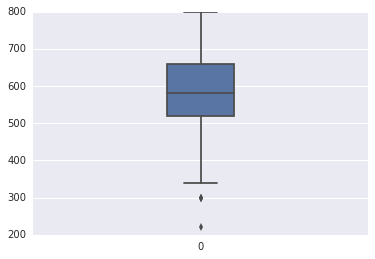

In [69]:
#df_clean[['gre']].boxplot(return_type='axes')
print "GRE Boxplot"
sns.boxplot(data=df_clean.gre, width=0.2)

GPA Boxplot


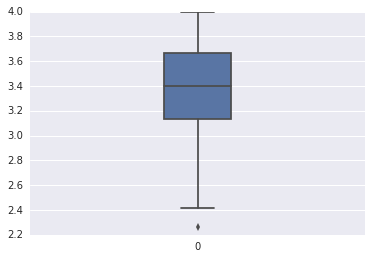

In [71]:
#df_clean[['gpa']].boxplot(return_type='axes')
print "GPA Boxplot"
sns.boxplot(data=df_clean.gpa, width=0.2)

#### Question 7. What do this plots show?

Answer: They show the min/max (feet) , mean (red line), and the standard deviation (box)

#### Question 8. Describe each distribution 

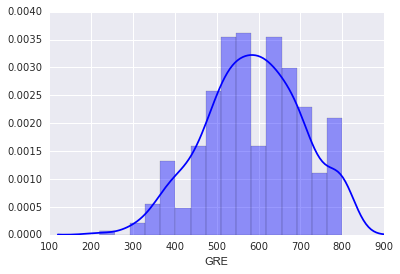

In [85]:
# plot the distribution of each variable 
sns.distplot(df_clean.gre, color='blue', axlabel="GRE")

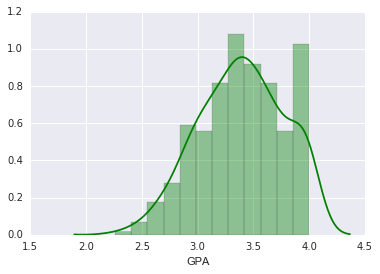

In [84]:
sns.distplot(df_clean.gpa, color='green', axlabel="GPA")

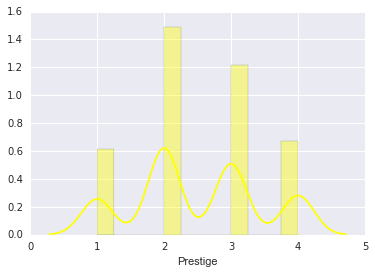

In [87]:
sns.distplot(df_clean.prestige, color='yellow', axlabel="Prestige")

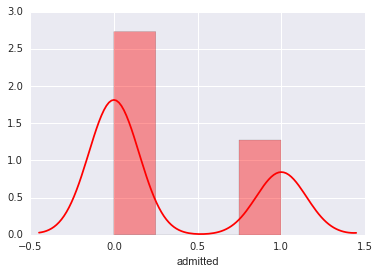

In [86]:
sns.distplot(df_clean.admit, color='red', axlabel="admitted")

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Looking at the graphs above, no. None of them meet the normal distribution model.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes it does, we would need to normalize the data.

#### Question 11. Which of our variables are potentially colinear? 

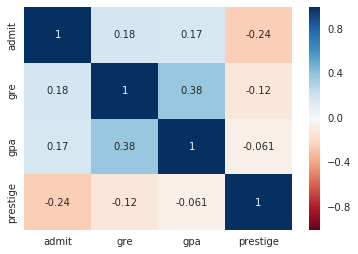

In [90]:
# create a correlation matrix for the data
sns.heatmap(df_clean.corr(), annot=True, cmap='RdBu')

#### Question 12. What did you find?

Answer: GRE and GPA have a pretty high correlation (38%) compared to the rest of the fields. They could potentially be colinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would divide the data into two sets containing the prestige values, one being the admitted students and one being the non-admitted students. I would then run the Levene Test on both samples and determine what the p-value is. If the p-value is less than 5% it is safe to assume the data does correlate, if it is larger the data does not.

#### Question 14. What is your hypothesis? 

Answer: Students with higher prestige values are more likely to be admitted into grad school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data